# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
new_cities = []
wind = []

In [4]:
# URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#set counters
city_counter = 1
set_counter = 1

print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

#query data
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        new_cities.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | chiredzi
Processing Record 2 of Set 1 | bardiyah
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | jalu
Processing Record 5 of Set 1 | pedernales
Processing Record 6 of Set 1 | tigil
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | knysna
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | mackay
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | bargal
City not found. Skipping...
Processing Record 21 of Set 1 | hortobagy
Processing Record 22 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Max Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
#create dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Max Temp      565
Lat           565
Lng           565
Wind Speed    565
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Lat,Lng,Wind Speed
0,Chiredzi,0,ZW,1588535365,40,67.30,-21.05,31.67,5.06
1,Al Bardīyah,37,LY,1588535365,83,64.80,31.76,25.09,10.78
2,Yellowknife,75,CA,1588535342,75,44.01,62.46,-114.35,9.17
3,Jalu,0,LY,1588535365,42,71.80,29.03,21.55,12.62
4,Pedernales,34,DO,1588535365,56,85.42,18.04,-71.74,3.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

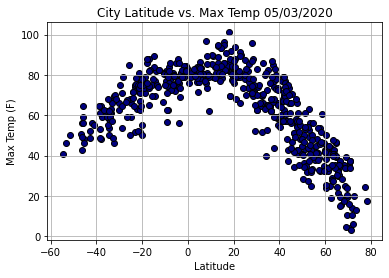

Looking at this plot, we can see that the further you are from the equator, the colder the maximum temperature is.


In [25]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title(f'City Latitude vs. Max Temp {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("output_data/temp.png")
plt.show()
print("Looking at this plot, we can see that the further you are from the equator, the colder the maximum temperature is.")

#### Latitude vs. Humidity Plot

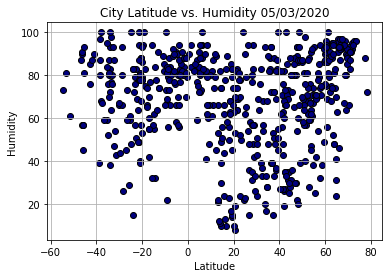

Looking at this plot we can assume that there is not a particularly strong correlation between humidity and latitude.


In [26]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_data/humidity.png")
plt.show()
print("Looking at this plot we can assume that there is not a particularly strong correlation between humidity and latitude.")

#### Latitude vs. Cloudiness Plot

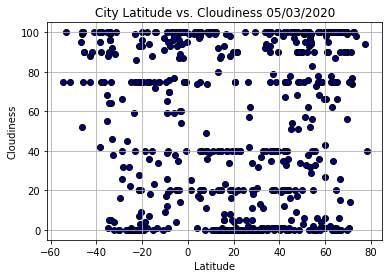

Looking at this plot we can assume that there is not a particularly strong correlation between cloudiness and latitude.


In [27]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/cloudiness.png")
plt.show()
print("Looking at this plot we can assume that there is not a particularly strong correlation between cloudiness and latitude.")

#### Latitude vs. Wind Speed Plot

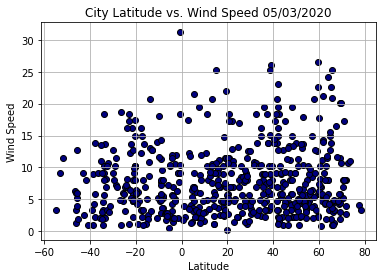

Looking at this plot we can assume that there is not a particularly strong correlation between wind speed and latitude.


In [28]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/wind_speed.png")
plt.show()
print("Looking at this plot we can assume that there is not a particularly strong correlation between wind speed and latitude.")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_LR(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7802557041073626


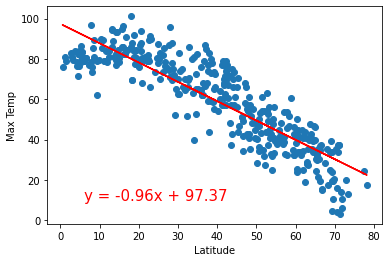

Looking at this regression, there appears to be an inverse correlation between max temperature and latitude in the Northern Hemisphere, meaning that the higher the latitude, the lower the max temperature. In other words, the closer you are to the equator in the Northern Hemisphere, the warmer the max temperature will be.  We can also tell that this correlation is strong because the R-Squared value is relatively high.


In [32]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plot_LR(x_values, y_values, 'Max Temp',(6,10))
print("Looking at this regression, there appears to be an inverse correlation between max temperature and latitude in the Northern Hemisphere, meaning that the higher the latitude, the lower the max temperature. In other words, the closer you are to the equator in the Northern Hemisphere, the warmer the max temperature will be.  We can also tell that this correlation is strong because the R-Squared value is relatively high.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5819911689064228


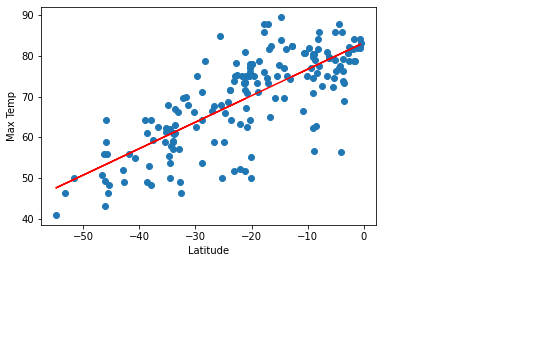

Looking at this regression, there appears to be a positive correlation between max temperature and latitude in the Southern Hemisphere, leading us to the same conclusion as the previous regression plot: the further away you get from the equator, the colder the max temperature will be. We can also tell that this correlation is strong because the R-Squared value is relatively high.


In [33]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plot_LR(x_values, y_values, 'Max Temp',(6,10))
print("Looking at this regression, there appears to be a positive correlation between max temperature and latitude in the Southern Hemisphere, leading us to the same conclusion as the previous regression plot: the further away you get from the equator, the colder the max temperature will be. We can also tell that this correlation is strong because the R-Squared value is relatively high.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04512621919008115


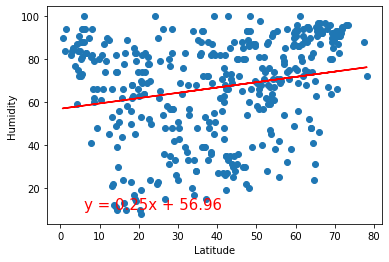

We can already see that there is not a significant relationship between humidity and latitude in the Northern Hemisphere because the R-Squared value is so low.


In [43]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plot_LR(x_values, y_values, 'Humidity',(6,10))
print("We can already see that there is not a significant relationship between humidity and latitude in the Northern Hemisphere because the R-Squared value is so low.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008130437148979458


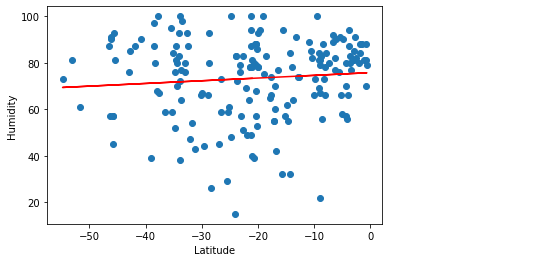

We can already see that there is not a significant relationship between humidity and latitude in the Southern Hemisphere because the R-Squared value is so low.


In [44]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plot_LR(x_values, y_values, 'Humidity',(6,10))
print("We can already see that there is not a significant relationship between humidity and latitude in the Southern Hemisphere because the R-Squared value is so low.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0542018020170685


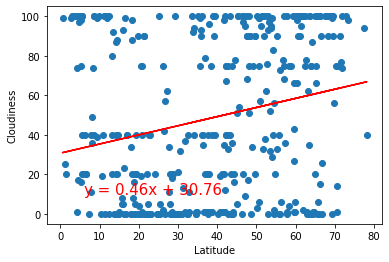

We can already see that there is not a significant relationship between cloudiness and latitude in the Northern Hemisphere because the R-Squared value is so low.


In [45]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plot_LR(x_values, y_values, 'Cloudiness',(6,10))
print("We can already see that there is not a significant relationship between cloudiness and latitude in the Northern Hemisphere because the R-Squared value is so low.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007481629159609653


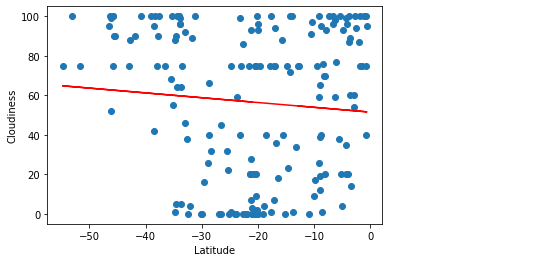

We can already see that there is not a significant relationship between cloudiness and latitude in the Southern Hemisphere because the R-Squared value is so low.


In [46]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plot_LR(x_values, y_values, 'Cloudiness',(6,10))
print("We can already see that there is not a significant relationship between cloudiness and latitude in the Southern Hemisphere because the R-Squared value is so low.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006399308704850385


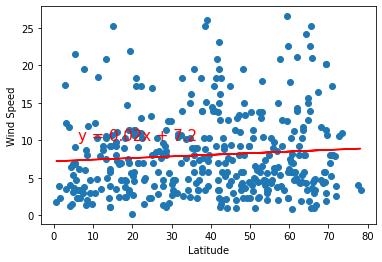

We can already see that there is not a significant relationship between humidity and latitude because the R-Squared value is so low.


In [41]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plot_LR(x_values, y_values, 'Wind Speed',(6,10))
print("We can already see that there is not a significant relationship between Wind Speed and latitude in the Northern Hemisphere because the R-Squared value is so low.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006198720007426811


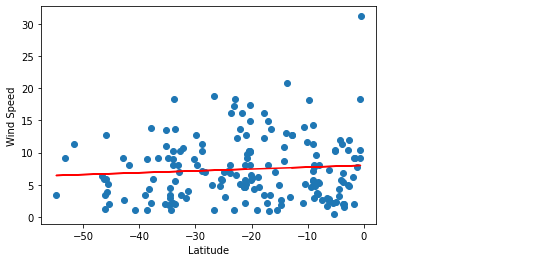

We can already see that there is not a significant relationship between Wind Speed and latitude in the Southern Hemisphere because the R-Squared value is so low.


In [47]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plot_LR(x_values, y_values, 'Wind Speed',(6,10))
print("We can already see that there is not a significant relationship between Wind Speed and latitude in the Southern Hemisphere because the R-Squared value is so low.")